In [73]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import matplotlib.dates as mdates;
import matplotlib.ticker as ticker;

# %matplotlib inline: only draw static
# images in the notebook
#%matplotlib inline

# Chapter 1

In [3]:
tablets = pd.read_csv('/home/zenbaei/Documents/Data_Statstics_Solutions_Notebooks/tablets.csv')
tablets.head()

,Tablet,Cost ($),Operating System,Display Size (centimeters),Battery Life (hours),CPU Manufacturer
0,Acer Iconia W510,599,Windows,25.7,8.5,Intel
1,Amazon Kindle Fire HD,299,Android,22.6,9.0,TI OMAP
2,Apple iPad 4,499,iOS,24.6,11.0,Apple
3,HP Envy X2,860,Windows,29.5,8.0,Intel
4,Lenovo ThinkPad Tablet,668,Windows,25.7,10.5,Intel


**2.a** **2.b**

In [4]:
tablets.shape
#tablets.columns.size

(10, 6)

**2.c**

In [5]:
tablets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tablet                      10 non-null     object 
 1   Cost ($)                    10 non-null     int64  
 2   Operating System            10 non-null     object 
 3   Display Size (centimeters)  10 non-null     float64
 4   Battery Life (hours)        10 non-null     float64
 5   CPU Manufacturer            10 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 608.0+ bytes


- 2 Categorical
- 3 Quantative

**2.d**

- Tablet, OS, CPU Mani: nominal scale

- Cost, Display, Batter: ratio scale


**3.a**

In [6]:
# np.mean(tablets['Cost ($)'])
np.sum(tablets['Cost ($)']) / tablets['Cost ($)']

0     9.731219
1    19.494983
2    11.681363
3     6.777907
4     8.726048
5     6.483871
6    10.998113
7     9.879661
8    11.102857
9    16.191667
Name: Cost ($), dtype: float64

**3.b**

In [7]:
winOS  = tablets['Operating System'] == "Windows"
adrOS = tablets['Operating System']  == 'Android'

winSum = np.sum(tablets[winOS]['Cost ($)'])
adrSum = np.sum(tablets.loc[adrOS, 'Cost ($)'])

avgWin = winSum / len(tablets.loc[winOS])
avgAdr = adrSum / len(tablets.loc[adrOS])

print(avgWin)
print(avgAdr)

723.2
428.5


**3.c**

In [8]:
cpu = tablets['CPU Manufacturer'] == 'TI OMAP'
( len(tablets.loc[cpu]) / len(tablets) ) * 100

20.0

**3.d**

In [9]:
( len(tablets.loc[adrOS]) / len(tablets) ) * 100

40.0

In [10]:
phones = pd.read_csv('/home/zenbaei/Documents/Data_Statstics_Solutions_Notebooks/phones.csv')
phones.head()


,Brand,Model,Price ($),Overall Score,Voice Quality,Talk Time (hours)
0,AT&T,CL84100,60,73,Excellent,7
1,AT&T,TL92271,80,70,Very Good,7
2,Panasonic,4773B,100,78,Very Good,13
3,Panasonic,6592T,70,72,Very Good,13
4,Uniden,D2997,45,70,Very Good,10


In [11]:
phones = phones.rename(str.strip, axis='columns')

for col in phones.columns:
  #is_col_object_dtype = is_object_dtype(df[column])
  if phones[col].dtype == object:
    phones[col] = phones[col].str.strip()

**4.a**

In [12]:
phones.shape

(8, 6)

**4.b**
- Price, Overall Score, Talk Time: Quantative
- Voice Quality: Categorical

**4.c**
- Model: Nominal
- Voice Quality: Ordinal
- Price, Talk Time: Ratio
- Overall Score: Interval

**5.a**

In [13]:
np.average(phones['Price ($)'])

68.125

**5.b**

In [14]:
np.average(phones['Talk Time (hours)'])

8.875

**5.c**

In [15]:
condition = phones['Voice Quality'] == 'Excellent'
result = phones.loc[condition, 'Voice Quality']
(result.size / len(phones['Voice Quality'])) * 100

25.0

**6**
- Categorical
- Ratio Quantative
- Categorical Ordinal
- Ration Quantative
- Categorical Ordinal

**7**
- Categorical
- Nominal

**8**
- 762
- Categorical
- Yes
- 762*0.67 = 511

**9**
- Categorical
- 23+18+30= 71 -> 71/30 -> 42%

**10**

- Categorical
- Yes
- 44+130+165+741 = 1080 -> 44/1080 * 100 = 4%
- Against

**11**

295 -> for/
672 -> against/
51 -> no opinion

- Categorical
- 1018
- 295/1080 = 27%
- Against

**12**
- 16
- Yes
- Quantative, Categorical, Categorical, Quantative

**13**
- Revenue
- Quantative
- Time Series
- For 10 years the revenue increased about 60%

**14.a**

In [16]:
data = [(327, 167, 204),
        (311, 140, 220),
        (286, 106, 300),
        (290, 108, 270)]
years = ['2007', '2008', '2009', '2010']
companies = pd.DataFrame(data, columns=['Hertz', 'Dollar', 'Avis'], index=years)

companies.head()

,Hertz,Dollar,Avis
2007,327,167,204
2008,311,140,220
2009,286,106,300
2010,290,108,270


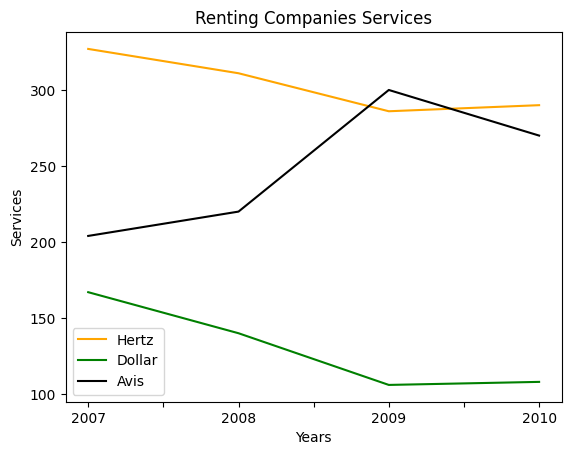

In [17]:
plt.xlabel('Years')
plt.ylabel('Services')

companies['Hertz'].plot(label='Hertz', color='orange')
companies['Dollar'].plot(label='Dollar', color='green')
companies['Avis'].plot(label='Avis', color='black')

plt.title('Renting Companies Services')
plt.legend()

**14**
- Hertz
- It shows to be dropping in between 2007 and 2009 for Hertz and Dollar whereas Avis is steadly growing, then stable from 2009 to 2010 but dropping for Avis
- Cross-sectional

<Axes: >

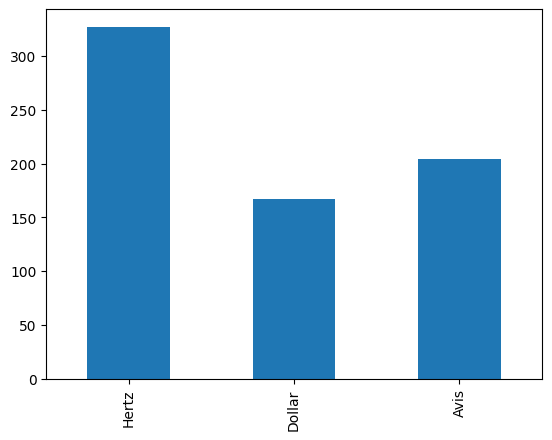

In [18]:
cmps = ['Hertz', 'Dollar', 'Avis']
companies.loc['2007'].plot.bar()

**15**
- Quantative
- Series
- July (1100)
- 61/4730 * 100 = 1% --- 76/4730 * 100 = 2% (yes resonable because of the off season)
- The accidents are high in general, specially during summer

**16**

In [43]:
gas = pd.read_excel('/home/zenbaei/Documents/Data_Statstics_Solutions_Notebooks/EMM_EPMRU_PTE_NUS_DPGm.xls', sheet_name='Data 1'
                    , skiprows=2)
gas.rename(columns={gas.columns[1] :' Dollars per Gallon'},
           inplace=True)
gas.head()

,Date,Dollars per Gallon
0,1990-08-15,NaN
1,1990-09-15,1.258
2,1990-10-15,1.335
3,1990-11-15,1.324
4,1990-12-15,NaN


<Axes: xlabel='Date', ylabel='Average Price Per Gallon'>

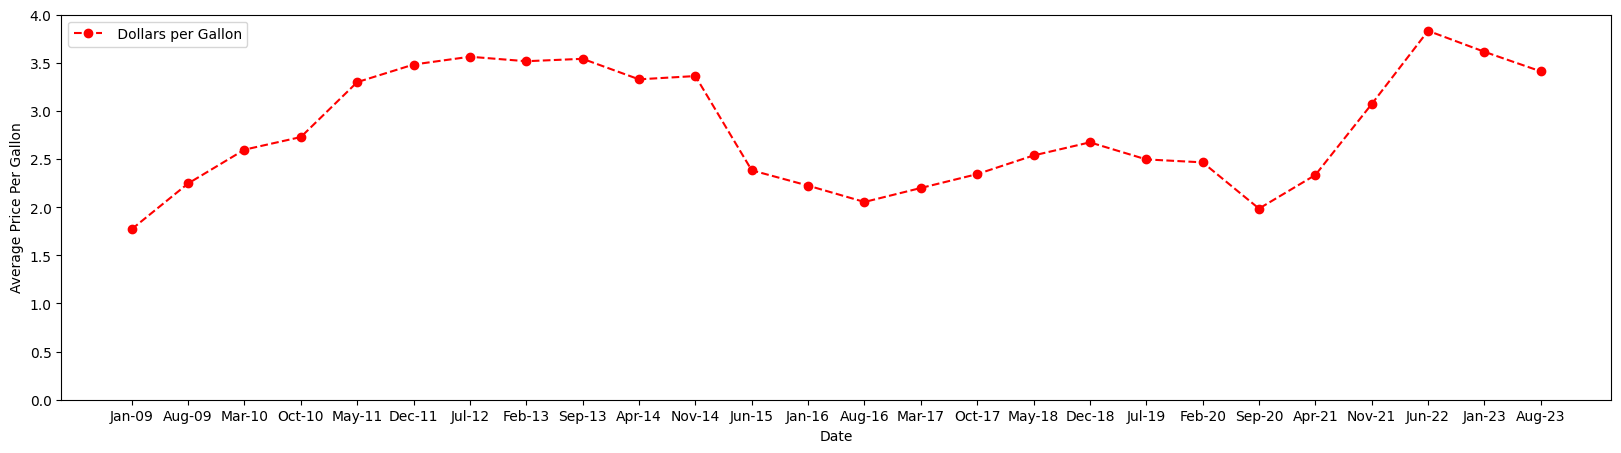

In [44]:
#modified answer (I thought the plot is grouped by every 7 months)
filterGas = gas.loc[gas['Date'].dt.year >= 2009].copy()
grouped = filterGas.groupby(pd.Grouper(key='Date', freq='7M')).mean()
grouped.index = grouped.index.strftime('%b-%y')
grouped.plot(xticks=range(0, len(grouped.index)),figsize=(20, 5), ylim=(0, 4), ylabel="Average Price Per Gallon"
             , style="--ro")

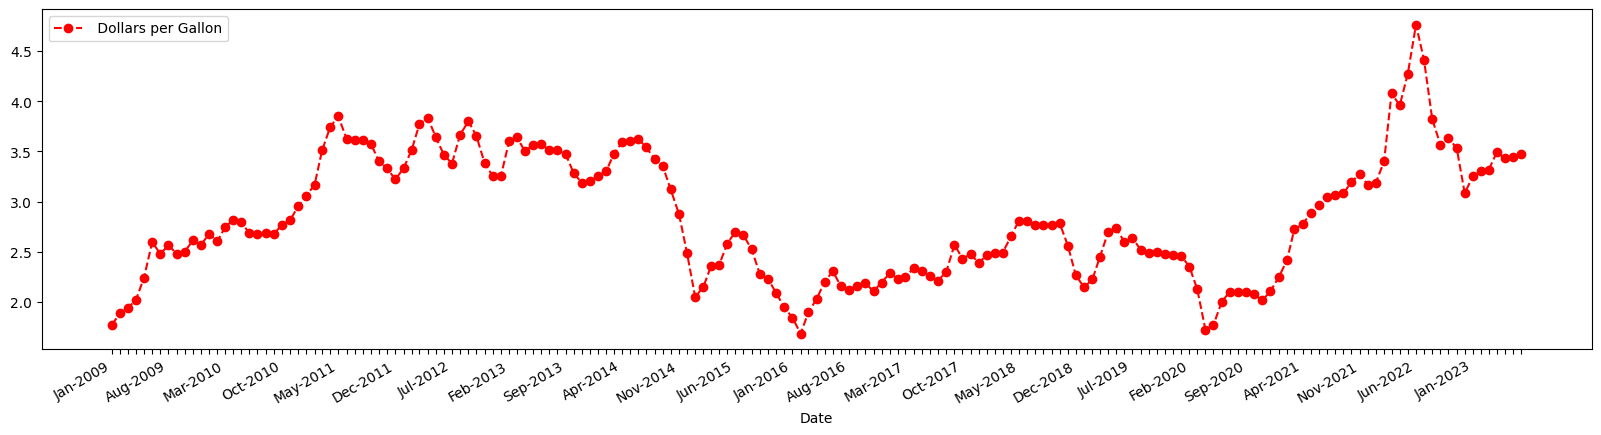

In [77]:
ax = filterGas.plot(x='Date', figsize=(20, 5), xticks=filterGas['Date'], style="--ro")
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 7 != 0:
        label.set_visible(False)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))


**23**
- Sample of people aged 25-29
- Do they own a Bch and work?
- Categorical